# Unit 5 - Financial Planning


In [85]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
import json

%matplotlib inline

In [86]:
# Load .env enviroment variables
load_dotenv("example.env")

True

## Part 1 - Personal Finance Planner

In [87]:
# Set monthly household income
# YOUR CODE HERE!
HHI = 4000

### Collect Crypto Prices Using the `requests` Library

In [88]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [89]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [90]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
#print(json.dumps(btc_response,indent=4))
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

In [91]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_response = requests.get(eth_url).json()
#print(json.dumps(eth_response,indent=4))                                             
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]                       
                                                
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
                                                

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")                         

The current value of your 1.2 BTC is $13746.05
The current value of your 5.3 ETH is $2029.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [92]:
# Current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
    "shares": [200, 50]
}

tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
AGG,200
SPY,50


In [93]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [94]:
alpaca_secret_key

'6c5Ras8VPBl9N8BBvZIdFjYkS1jIODmOZNZgkKfN'

In [95]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

#df_portfolio
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.93
Current SPY closing price: $352.43


In [96]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17621.50
The current value of your 200 AGG shares is $23586.00


### Savings Health Analysis

In [97]:
# Create savings DataFrame
# YOUR CODE HERE!
value_data = [my_agg_value + my_spy_value, my_btc_value + my_eth_value]

df_savings = pd.DataFrame(value_data, index=["Shares", "Crypto"], columns =["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Shares,41207.500
Crypto,15775.047


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

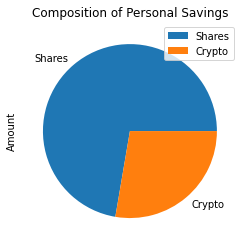

In [98]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y= "Amount", title="Composition of Personal Savings")

In [99]:
# Set ideal emergency fund
emergency_fund = HHI * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings = df_savings.sum()
print(type(savings['Amount']))
savings = savings['Amount']
savings

needed = savings - emergency_fund


# # Validate saving health
# # YOUR CODE HERE!
if savings > emergency_fund:
     print("Congratulations for having enough money in this fund!")
elif savings == emergency_fund:
     print("Congratulations on reaching this financial goal")
elif savings < emergency_fund:
    print(f"You need ${needed} to reach your goal of saving at least three times your monthly expenses.")

<class 'numpy.float64'>
Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [100]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [101]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [102]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [143]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [144]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [145]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003879,0.998023,0.995280,1.000543,0.999522,0.993069,0.993327,1.000796,1.000981,1.014346,...,1.001373,1.000254,1.000809,0.983621,1.008899,1.006464,0.999540,1.002122,0.998979,0.992661
2,1.013570,1.001254,1.001915,1.016917,1.008615,0.995919,1.007284,0.999891,0.991063,1.013793,...,1.008732,1.002705,1.004038,0.984912,1.015517,1.000983,0.992913,1.006720,1.006041,0.997788
3,1.025110,0.999226,0.995479,1.014404,1.000236,1.006091,0.991687,0.996201,0.993584,1.002068,...,1.009433,1.001131,1.000364,0.985357,1.015829,1.007359,0.977902,1.005653,1.012894,0.992683
4,1.021195,1.006590,0.989814,1.007701,0.999608,1.001284,0.995936,0.998038,0.998444,1.004021,...,1.002478,1.002034,1.003104,0.994259,1.012869,1.015717,0.968967,1.011436,1.014799,0.991809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.514107,3.973056,37.358642,12.011183,3.988269,18.981939,4.871381,4.475990,34.818869,5.136980,...,11.071521,2.086127,7.556739,7.874932,7.081084,4.748513,8.982111,12.630574,3.825783,5.607744
7557,4.484102,4.028173,37.190954,12.077882,3.942571,19.059695,4.883766,4.389970,35.302725,5.136503,...,11.103190,2.073098,7.574568,7.792793,7.094612,4.773083,8.957688,12.517404,3.856537,5.655979
7558,4.465393,4.019564,37.189129,12.084800,3.942166,19.174841,4.941076,4.375813,35.447554,5.113952,...,11.100221,2.053891,7.626036,7.804995,7.118642,4.683778,8.974564,12.591227,3.830972,5.609309
7559,4.471814,4.027698,36.790714,12.031967,3.972100,19.159309,4.951819,4.421651,35.249435,5.078520,...,11.086832,2.086337,7.740177,7.717514,7.046400,4.685721,8.923783,12.449314,3.863932,5.635100


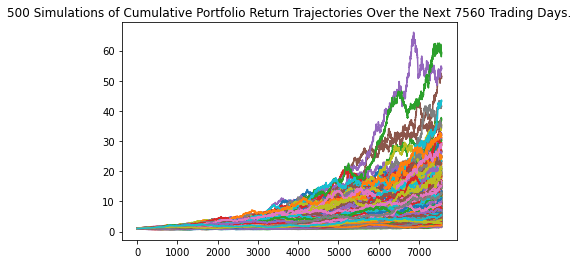

In [146]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

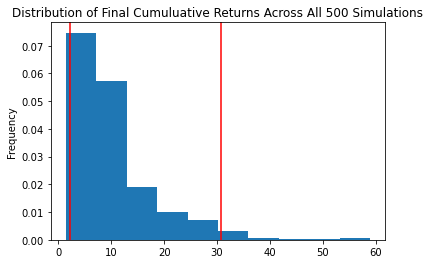

In [147]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [149]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.294604
std               7.936203
min               1.400358
25%               4.891979
50%               7.937228
75%              12.664502
max              58.963254
95% CI Lower      2.257167
95% CI Upper     30.784414
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [150]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45143.33 and $615688.28


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [151]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67715.0 and $923532.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [152]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [153]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997699,1.003176,0.997656,0.995197,1.002165,0.999237,0.999184,1.005784,1.003489,0.992288,...,0.999287,1.002778,0.996428,0.999800,1.003004,1.004579,1.005204,1.005185,1.006135,1.005770
2,0.997377,1.001969,0.993339,0.997643,1.001078,0.994281,0.997873,1.008795,0.994757,0.994564,...,1.003767,1.000274,0.996647,0.994882,1.001735,1.002607,1.002272,1.003918,1.007478,1.013717
3,0.993180,1.004114,0.993524,0.994220,1.000465,0.992049,0.997960,1.001932,0.993723,0.994994,...,1.013708,0.998534,0.995386,0.997317,1.004108,1.003658,1.000875,1.002607,1.004537,1.012114
4,0.988685,0.998112,0.994700,0.993881,0.991752,0.997025,0.996651,1.002478,0.996618,1.000855,...,1.010137,1.002714,1.000578,0.999250,1.002137,0.996959,0.998006,1.004769,1.003086,1.013838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.381573,1.106297,1.111401,1.328507,1.327205,1.006089,1.031435,1.194152,1.260612,1.260819,...,1.013096,1.224335,1.002450,1.384615,1.021652,1.195152,1.147830,0.889066,1.045876,1.316188
1257,1.379169,1.111058,1.102544,1.330901,1.329763,0.998370,1.030861,1.194322,1.263019,1.262693,...,1.012694,1.218312,1.003763,1.389869,1.024525,1.188023,1.147521,0.893100,1.044060,1.315665
1258,1.378062,1.110139,1.103395,1.323606,1.339491,0.994175,1.023575,1.198186,1.260717,1.264545,...,1.015182,1.210876,1.002612,1.393385,1.022933,1.188077,1.163661,0.890047,1.042332,1.324388
1259,1.384320,1.103972,1.106834,1.325818,1.335057,0.995422,1.026021,1.202191,1.263892,1.266493,...,1.015863,1.213715,1.006490,1.397656,1.021268,1.192044,1.162319,0.890534,1.041563,1.319798


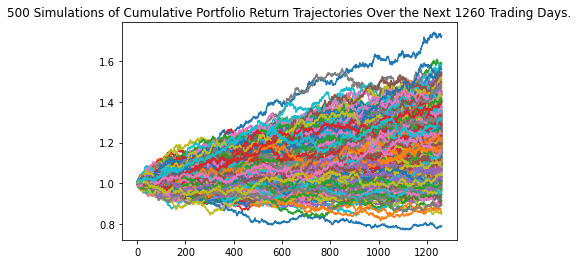

In [154]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

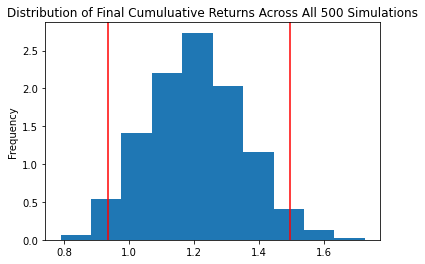

In [155]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()

In [156]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.202718
std               0.146311
min               0.789265
25%               1.096474
50%               1.200299
75%               1.295822
max               1.724732
95% CI Lower      0.936270
95% CI Upper      1.494439
Name: 1260, dtype: float64


In [157]:
# Set initial investment
# YOUR CODE HERE!
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56176.18 and $89666.35


### Ten Years Retirement Option

In [158]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [159]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004591,0.999033,1.007214,1.001741,1.001839,1.000068,1.001679,0.997253,0.998065,0.992270,...,0.999291,1.002369,1.005035,1.000103,1.004051,1.000280,1.002023,0.996928,1.001475,1.000712
2,1.014402,1.007750,1.012847,1.011889,0.992980,1.000920,1.003572,0.996836,0.997303,0.990632,...,0.994203,1.003011,1.006282,1.002103,1.003755,0.997864,1.002958,0.999312,1.004053,1.001392
3,1.018345,1.008576,1.017343,1.005061,0.999729,0.999547,1.004749,1.000255,0.995390,0.998276,...,0.995822,1.006092,1.002083,1.000149,1.007396,1.002900,1.006825,1.002781,1.004667,1.002828
4,1.021291,1.005594,1.016901,1.003589,1.002837,0.994521,1.002766,0.995629,0.994896,0.999475,...,0.995874,1.004457,1.000796,1.000320,1.001978,0.997685,1.010073,1.006712,0.997553,0.999615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.993983,1.338937,1.237495,1.622683,1.434634,1.401793,0.934434,1.430197,1.659440,1.670545,...,1.707995,1.719109,1.239140,2.233133,1.377804,1.833797,1.256561,1.512180,1.293530,1.695689
2517,1.991102,1.332097,1.236880,1.624947,1.433454,1.398955,0.930376,1.425799,1.654692,1.664052,...,1.701134,1.723898,1.242881,2.238053,1.370365,1.843359,1.259049,1.505982,1.297621,1.697821
2518,1.993907,1.325082,1.242209,1.623623,1.438082,1.396936,0.929454,1.430014,1.655346,1.662664,...,1.702250,1.723739,1.237274,2.227036,1.362541,1.847129,1.254208,1.507563,1.296200,1.694161
2519,2.002258,1.323067,1.239672,1.614655,1.433754,1.401011,0.927760,1.428191,1.654142,1.649798,...,1.697921,1.716967,1.236603,2.230554,1.358917,1.856414,1.252217,1.507510,1.295046,1.697915


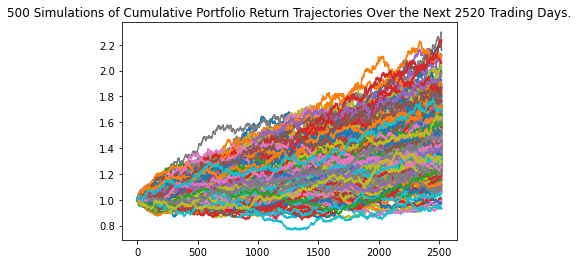

In [160]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

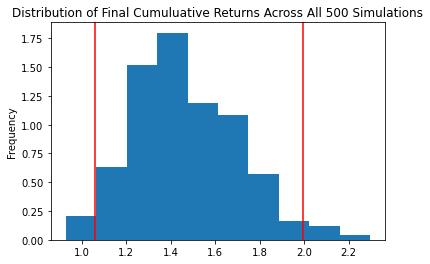

In [161]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()

In [162]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_fiveyear.summarize_cumulative_return()


# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.466115
std               0.238034
min               0.928696
25%               1.292610
50%               1.435979
75%               1.631987
max               2.296233
95% CI Lower      1.061422
95% CI Upper      1.992698
Name: 2520, dtype: float64


In [163]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63685.33 and $119561.88
